In [40]:
'''
Creating to run Model D Conv1d_mfcc40
different layer system
full mfcc 13 features
Created on 2020.12.11
Label: Polarity

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [41]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfcc13_axis0_pol.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfcc13_axis0_pol.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfcc13_axis0_pol.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfcc13_axis0_pol.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [42]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 13)


In [43]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
#     model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [28]:
def model_d_conv1d_flip(input_shape):
    model = Sequential()
    model.add(Conv1D(256, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [44]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 216, 32)           1280      
_________________________________________________________________
activation_30 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_31 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_9 (

In [45]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_d_conv1d_mfcc13_pol.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [46]:
batch_size = 16

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 0.94255, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 26s - loss: 0.9718 - accuracy: 0.5708 - val_loss: 0.9426 - val_accuracy: 0.6310
Epoch 2/150

Epoch 00002: val_loss improved from 0.94255 to 0.92723, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 24s - loss: 0.8977 - accuracy: 0.6328 - val_loss: 0.9272 - val_accuracy: 0.6310
Epoch 3/150

Epoch 00003: val_loss improved from 0.92723 to 0.92135, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 26s - loss: 0.8872 - accuracy: 0.6329 - val_loss: 0.9213 - val_accuracy: 0.6310
Epoch 4/150

Epoch 00004: val_loss improved from 0.92135 to 0.91375, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 28s - loss: 0.8772 - accuracy: 0.6331 - val_loss: 0.9138 - val_accuracy: 0.6312
Epoch 5/150

Epoch 00005: val_loss improved from 0.91375 to 0.91114, saving model to ./models_saved/model_d_conv1d_mfcc1

Epoch 38/150

Epoch 00038: val_loss improved from 0.81818 to 0.81404, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 21s - loss: 0.7420 - accuracy: 0.6907 - val_loss: 0.8140 - val_accuracy: 0.6806
Epoch 39/150

Epoch 00039: val_loss did not improve from 0.81404
1217/1217 - 21s - loss: 0.7394 - accuracy: 0.6941 - val_loss: 0.8150 - val_accuracy: 0.6804
Epoch 40/150

Epoch 00040: val_loss improved from 0.81404 to 0.81165, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 22s - loss: 0.7360 - accuracy: 0.6945 - val_loss: 0.8116 - val_accuracy: 0.6816
Epoch 41/150

Epoch 00041: val_loss did not improve from 0.81165
1217/1217 - 21s - loss: 0.7360 - accuracy: 0.6921 - val_loss: 0.8122 - val_accuracy: 0.6824
Epoch 42/150

Epoch 00042: val_loss improved from 0.81165 to 0.81002, saving model to ./models_saved/model_d_conv1d_mfcc13_pol.h5
1217/1217 - 22s - loss: 0.7328 - accuracy: 0.6944 - val_loss: 0.8100 - val_accuracy: 0.6841
Epoch 43/150

Epoch 

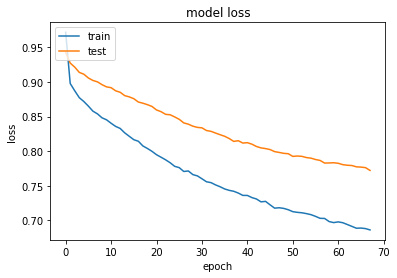

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

305/305 - 1s - loss: 0.7796 - accuracy: 0.6931
score: 0.78
acc: 0.69


In [49]:
# load labels
with open('./Data_Array_Storage/labels_mfcc13_axis0_pol.pkl', 'rb') as f:
    lb = pickle.load(f)

In [50]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=batch_size, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

305/305 [==============================] - 1s 3ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,negative,negative
151,negative,negative
152,negative,negative
153,negative,negative
154,neutral,negative
155,negative,negative
156,negative,negative
157,negative,negative
158,negative,negative
159,negative,negative


In [52]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.6931140801644399


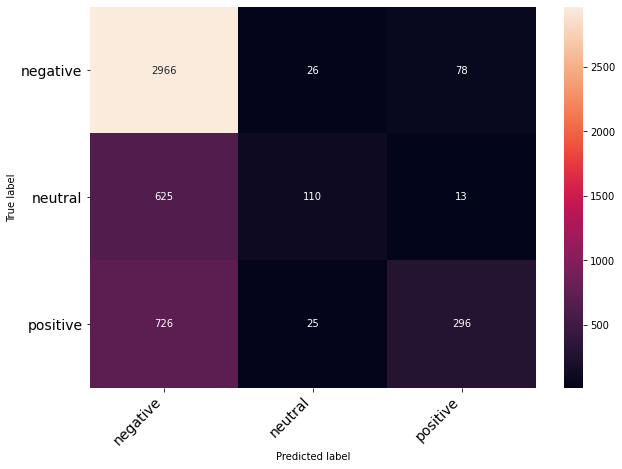

In [53]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [54]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

    negative       0.69      0.97      0.80      3070
     neutral       0.68      0.15      0.24       748
    positive       0.76      0.28      0.41      1047

    accuracy                           0.69      4865
   macro avg       0.71      0.47      0.49      4865
weighted avg       0.70      0.69      0.63      4865

